In [1163]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [1164]:
print(df.columns)

df.columns = [col.strip().title() for col in df.columns]

print("\nCapitalizing all column names...")
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Capitalizing all column names...
Index(['Gender', 'Race/Ethnicity', 'Parental Level Of Education', 'Lunch',
       'Test Preparation Course', 'Math Score', 'Reading Score',
       'Writing Score'],
      dtype='object')


In [1165]:
df.columns = [col.replace(" ", '_') for col in df.columns]
print("Removing spaces from column names...\n")
print(df.columns)

Removing spaces from column names...

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_Of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')


In [1166]:
print(df['Race/Ethnicity'])

df['Race/Ethnicity'] = df['Race/Ethnicity'].str.replace('group ', '', case = False)

print('\nRemoving "group " from "Race/Ethnicity" column...')
df['Race/Ethnicity']

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: Race/Ethnicity, Length: 1000, dtype: object

Removing "group " from "Race/Ethnicity" column...


0      B
1      C
2      B
3      A
4      C
      ..
995    E
996    C
997    C
998    D
999    D
Name: Race/Ethnicity, Length: 1000, dtype: object

In [1167]:
print('Cleaning values...\n')
df['Gender'] = df['Gender'].str.title()

df['Parental_Level_Of_Education'] = df['Parental_Level_Of_Education'].str.strip().str.title()

df['Lunch'] = df['Lunch'].str.title()

df['Test_Preparation_Course'] = df['Test_Preparation_Course'].str.title()

df.head()

Cleaning values...



,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,Female,B,Bachelor'S Degree,Standard,None,72,72,74
1,Female,C,Some College,Standard,Completed,69,90,88
2,Female,B,Master'S Degree,Standard,None,90,95,93
3,Male,A,Associate'S Degree,Free/Reduced,None,47,57,44
4,Male,C,Some College,Standard,None,76,78,75


In [1168]:
df.to_excel('Cleaned_students_performance.xlsx', index=False)

In [1169]:
print('After adding Average_Score column: ')
df['Average_Score'] = round(df[['Math_Score', 'Reading_Score', 'Writing_Score']].mean(axis = 1),2)
df.head()

After adding Average_Score column: 


,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Average_Score
0,Female,B,Bachelor'S Degree,Standard,None,72,72,74,72.67
1,Female,C,Some College,Standard,Completed,69,90,88,82.33
2,Female,B,Master'S Degree,Standard,None,90,95,93,92.67
3,Male,A,Associate'S Degree,Free/Reduced,None,47,57,44,49.33
4,Male,C,Some College,Standard,None,76,78,75,76.33


In [1170]:
print(df.shape)
print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.',)

(1000, 9)
The dataframe contains 1000 rows and 9 columns.


In [1171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Race/Ethnicity               1000 non-null   object 
 2   Parental_Level_Of_Education  1000 non-null   object 
 3   Lunch                        1000 non-null   object 
 4   Test_Preparation_Course      1000 non-null   object 
 5   Math_Score                   1000 non-null   int64  
 6   Reading_Score                1000 non-null   int64  
 7   Writing_Score                1000 non-null   int64  
 8   Average_Score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [1172]:
duplicates = df.duplicated().sum()

if duplicates > 0:
    print("Checking for duplicates...")
    print(f'Total {duplicates} duplicates found.')
    df = df.drop_duplicates()
    print("Duplicates removed successfully.")
else:
    print("There is no duplicate found.")
    

There is no duplicate found.


In [1173]:
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
    print("Checking for missing values...")
    print(f'Total {total_missing} missing values found.')
    print(missing_values[missing_values > 0])
else:
    print(missing_values)
    print("\nThere is no missing value found.")
    

Gender                         0
Race/Ethnicity                 0
Parental_Level_Of_Education    0
Lunch                          0
Test_Preparation_Course        0
Math_Score                     0
Reading_Score                  0
Writing_Score                  0
Average_Score                  0
dtype: int64

There is no missing value found.


In [1174]:
print("Checking datatype of columns...\n")
print(df.dtypes)

Checking datatype of columns...

Gender                          object
Race/Ethnicity                  object
Parental_Level_Of_Education     object
Lunch                           object
Test_Preparation_Course         object
Math_Score                       int64
Reading_Score                    int64
Writing_Score                    int64
Average_Score                  float64
dtype: object


In [1175]:
print('Getting the summary statistics...\n')
print(df.describe().round(2))

Getting the summary statistics...

       Math_Score  Reading_Score  Writing_Score  Average_Score
count     1000.00        1000.00        1000.00        1000.00
mean        66.09          69.17          68.05          67.77
std         15.16          14.60          15.20          14.26
min          0.00          17.00          10.00           9.00
25%         57.00          59.00          57.75          58.33
50%         66.00          70.00          69.00          68.33
75%         77.00          79.00          79.00          77.67
max        100.00         100.00         100.00         100.00


In [1176]:
cat_cols = ['Gender', 'Race/Ethnicity', 'Parental_Level_Of_Education', 'Lunch',
       'Test_Preparation_Course']
for col in cat_cols:
    print(df[col].value_counts())
    print('\n')

Gender
Female    518
Male      482
Name: count, dtype: int64


Race/Ethnicity
C    319
D    262
B    190
E    140
A     89
Name: count, dtype: int64


Parental_Level_Of_Education
Some College          226
Associate'S Degree    222
High School           196
Some High School      179
Bachelor'S Degree     118
Master'S Degree        59
Name: count, dtype: int64


Lunch
Standard        645
Free/Reduced    355
Name: count, dtype: int64


Test_Preparation_Course
None         642
Completed    358
Name: count, dtype: int64




In [1177]:
score_cols = ['Math_Score', 'Reading_Score', 'Writing_Score']

print("Checking for outliers...\n")
for col in score_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - (1.5*IQR)
    UW = Q3 + (1.5*IQR)
    outliers = df[(df[col]<LW) | (df[col]>UW)]
    print(f"{col} : {len(outliers)}")

Checking for outliers...

Math_Score : 8
Reading_Score : 6
Writing_Score : 5


In [1178]:
print("Checking skewness:")
print(f'Math_Score: {round(df['Math_Score'].skew(),4)}')
print(f'Reading_Score: {round(df['Reading_Score'].skew(),4)}')
print(f'Writing_Score: {round(df['Writing_Score'].skew(),4)}')

Checking skewness:
Math_Score: -0.2789
Reading_Score: -0.2591
Writing_Score: -0.2894


# Visualization:

Visualizing distribution of Scores:



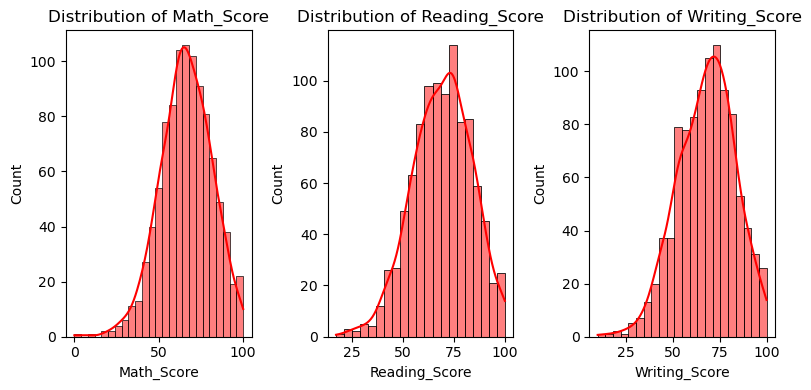

In [1180]:
import matplotlib.pyplot as plt
import seaborn as sns

score_cols = ['Math_Score', 'Reading_Score', 'Writing_Score']

print("Visualizing distribution of Scores:\n")
plt.figure(figsize = (8,4))
for i, col in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

* The skewness values for all three subjects are negative (Math_Score: -0.2789, Reading_Score: -0.2591, Writing_Score: -0.2894).
* The skewness values are relatively close to zero, suggesting that the skewness is not very pronounced.

Average Scores by Gender:



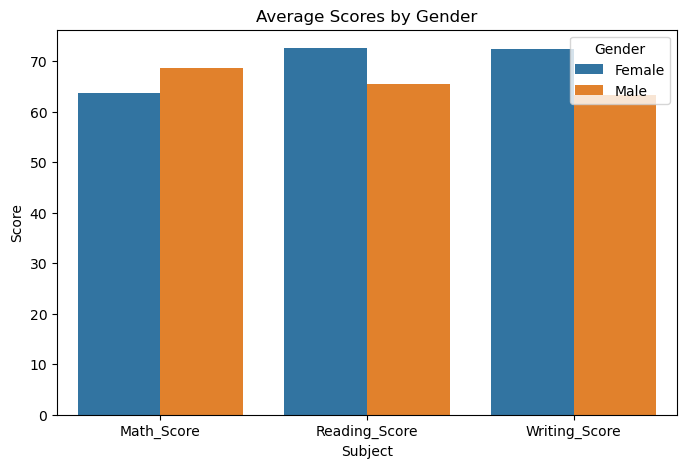

In [1181]:
print("Average Scores by Gender:\n")
plt.figure(figsize=(8, 5))
avg_scores_by_gender = df.groupby('Gender')[score_cols].mean().reset_index()
avg_scores_by_gender = avg_scores_by_gender.melt(id_vars='Gender', var_name='Subject', value_name='Average Score')

sns.barplot(data=avg_scores_by_gender, x='Subject', y='Average Score', hue='Gender')
plt.title('Average Scores by Gender')
plt.ylabel('Score')
plt.show()


*  Females consistently have higher average scores in both Reading_Score and Writing_Score compared to males.
*  Males have a slightly higher average score in Math_Score compared to females.
*  The chart suggests potential gender differences in learning styles or subject preferences.

In [1183]:
education_order = {'Some High School': 0,
                   'High School': 1,
                   'Some College': 2,
                   "Associate'S Degree": 3,
                   "Bachelor'S Degree": 4,
                   "Master'S Degree": 5}
df['Education_Level_Encoded'] = df['Parental_Level_Of_Education'].map(education_order)    


Parental Education(Encoded) vs Student Performance :



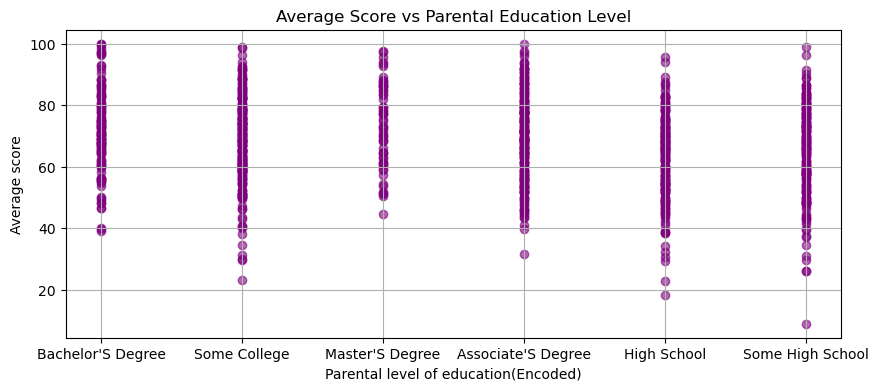

In [1184]:
print("Parental Education(Encoded) vs Student Performance :\n")
plt.figure(figsize = (10,4))
plt.scatter(df['Parental_Level_Of_Education'], df['Average_Score'], alpha = 0.6, color = 'purple')
plt.xlabel('Parental level of education(Encoded)')
plt.ylabel('Average score')
plt.title('Average Score vs Parental Education Level')
plt.grid(True)
plt.show()

* There's a no such trend between parental education level and average score. But students whose parents have higher education levels (Bachelor's, Master's, Associate's) tend to have a wider range of scores, including higher scores.
* There's significant variability in scores across all parental education levels. This suggests that parental education is not the sole determinant of student performance. Other factors (student's effort, teaching quality, resources, etc.) likely play a role.

Correlation Heatmap Between Scores:



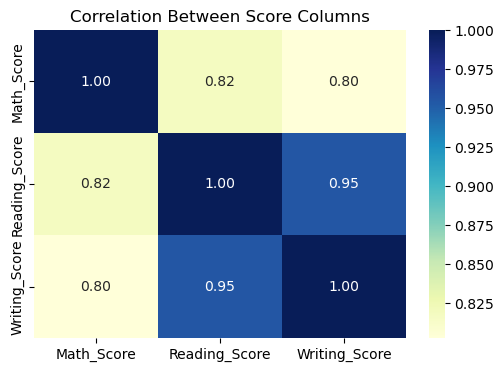

In [1186]:
print("Correlation Heatmap Between Scores:\n")
plt.figure(figsize = (6,4))
sns.heatmap(df[score_cols].corr(), annot = True, cmap = 'YlGnBu', fmt = '.2f')
plt.title("Correlation Between Score Columns")
plt.show()

* All three scores show strong positive correlations with each other. This means that students who score well in one subject tend to score well in the others.
* The strongest correlation is between Reading_Score and Writing_Score (0.95). This suggests that students with strong reading skills are likely to have strong writing skills, and vice versa.

Gender ratio:



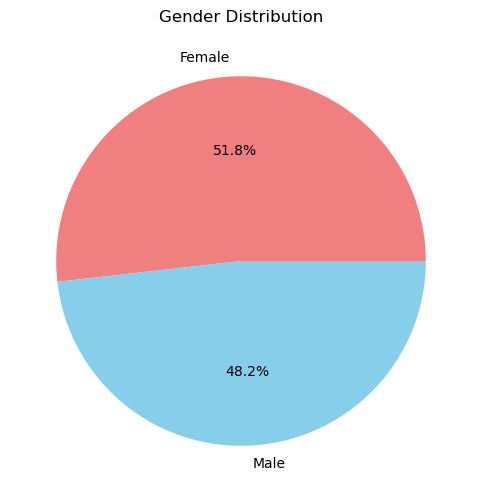

In [1188]:
print("Gender ratio:\n")
gender_count = df['Gender'].value_counts()
plt.figure(figsize = (7, 6))
plt.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Gender Distribution')
plt.show()

* The chart shows that there are slightly more females (51.8%) than males (48.2%) in the dataset.